In [1]:
import warnings
# Suppress specific warnings related to MKL
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For data visualization
from sklearn.preprocessing import StandardScaler  # For standardizing the data
from sklearn.decomposition import PCA  # For dimensionality reduction using PCA
from sklearn.linear_model import LinearRegression # For Line Fitting
from sklearn.cluster import KMeans  # For KMeans clustering
from sklearn.metrics import silhouette_score  # For evaluating clustering using silhouette score

In [2]:
# Load the dataset
df = pd.read_csv('WineQT.csv')

# Display the first few rows of the dataset to get an overview
print("First 5 rows of the dataset:")
print(df.head())

# Get basic info about the dataset
print("\nBasic information about the dataset:")
print(df.info())

# Display basic statistics of numerical columns
print("\nSummary statistics of the dataset:")
print(df.describe())

# Check for missing values
print("\nCheck for missing values:")
print(df.isnull().sum())

# Check the shape of the dataset (rows and columns)
print("\nShape of the dataset (rows, columns):")
print(df.shape)

# Display column names to understand the features
print("\nColumn names in the dataset:")
print(df.columns)

First 5 rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1    

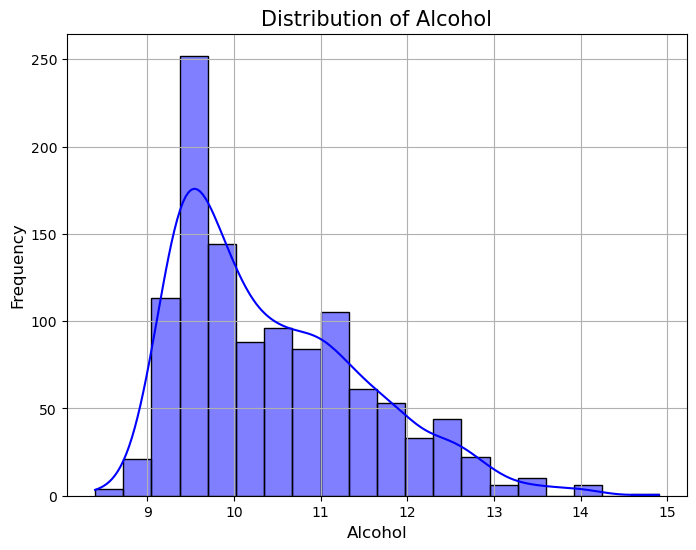


Frequency Table for 'alcohol':
alcohol
(8.394, 8.725]       4
(8.725, 9.05]       21
(9.05, 9.375]      113
(9.375, 9.7]       252
(9.7, 10.025]      144
(10.025, 10.35]     88
(10.35, 10.675]     96
(10.675, 11.0]     123
(11.0, 11.325]      66
(11.325, 11.65]     61
(11.65, 11.975]     53
(11.975, 12.3]      42
(12.3, 12.625]      35
(12.625, 12.95]     22
(12.95, 13.275]      6
(13.275, 13.6]      10
(13.6, 13.925]       0
(13.925, 14.25]      6
(14.25, 14.575]      0
(14.575, 14.9]       1
Name: count, dtype: int64


In [13]:
def plot_histogram_with_table(data, column, bins=20, kde=True, color='blue'):

    # Plot the histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], bins=bins, kde=kde, color=color)
    plt.title(f'Distribution of {column.title()}', fontsize=15)
    plt.xlabel(column.title(), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.show()
    
    # Create bins for the column
    bin_edges = pd.cut(data[column], bins=bins)
    
    # Generate the frequency table
    frequency_table = bin_edges.value_counts().sort_index()
    
    # Display the frequency table
    print(f"\nFrequency Table for '{column}':")
    print(frequency_table)

# Call the function for the 'alcohol' column
plot_histogram_with_table(df, column='alcohol', bins=20, kde=True, color='blue')

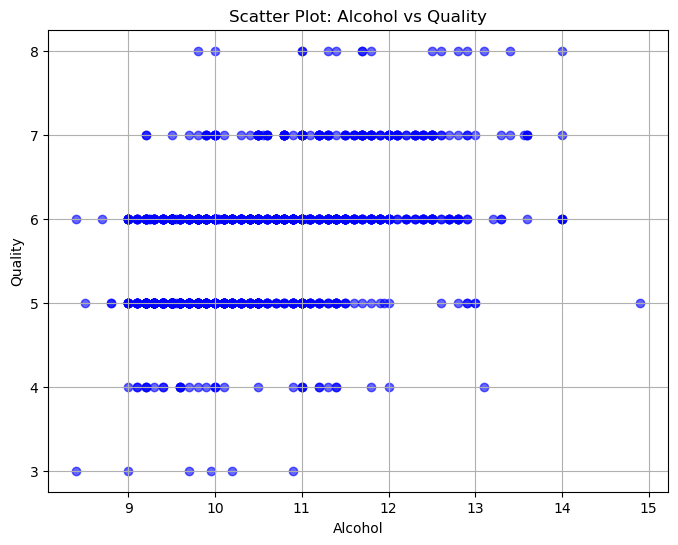


Correlation Table (Alcohol vs Quality):
          alcohol   quality
alcohol  1.000000  0.484866
quality  0.484866  1.000000


In [17]:
def scatter_plot_with_correlation(data, x_col, y_col, alpha=0.6, color='blue'):

    # Plot the scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(data[x_col], data[y_col], alpha=alpha, color=color)
    plt.title(f'Scatter Plot: {x_col.title()} vs {y_col.title()}')
    plt.xlabel(x_col.title())
    plt.ylabel(y_col.title())
    plt.grid(True)
    plt.show()
    
    # Calculate and display the correlation table
    correlation_table = data[[x_col, y_col]].corr()
    print(f"\nCorrelation Table ({x_col.title()} vs {y_col.title()}):")
    print(correlation_table)

# Call the function for the 'alcohol' and 'quality' columns
scatter_plot_with_correlation(df, x_col='alcohol', y_col='quality', alpha=0.6, color='blue')

C:\Users\kaush\AppData\Local\Temp\ipykernel_24620\1795580318.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=x_col, y=y_col, palette=palette)


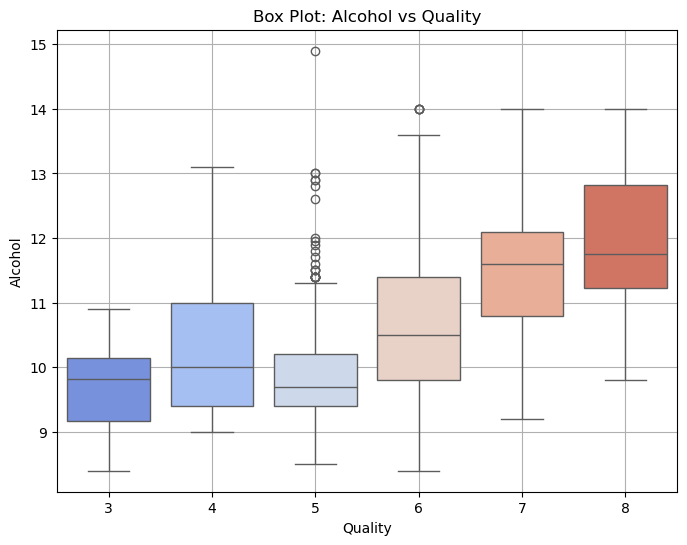


Table: Descriptive Statistics of Alcohol by Quality
         min     25%     50%      75%   max
quality                                    
3        8.4   9.175   9.825  10.1375  10.9
4        9.0   9.400  10.000  11.0000  13.1
5        8.5   9.400   9.700  10.2000  14.9
6        8.4   9.800  10.500  11.4000  14.0
7        9.2  10.800  11.600  12.1000  14.0
8        9.8  11.225  11.750  12.8250  14.0


In [19]:
def box_plot_with_summary(data, x_col, y_col, palette='coolwarm'):

    # Create the box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x=x_col, y=y_col, palette=palette)
    plt.title(f'Box Plot: {y_col.title()} vs {x_col.title()}')
    plt.xlabel(x_col.title())
    plt.ylabel(y_col.title())
    plt.grid(True)
    plt.show()
    
    # Generate and display a summary table
    summary_table = data.groupby(x_col)[y_col].describe()
    print(f"\nTable: Descriptive Statistics of {y_col.title()} by {x_col.title()}")
    print(summary_table[['min', '25%', '50%', '75%', 'max']])

# Example Usage:
# Call the function for the 'quality' and 'alcohol' columns
box_plot_with_summary(df, x_col='quality', y_col='alcohol', palette='coolwarm')

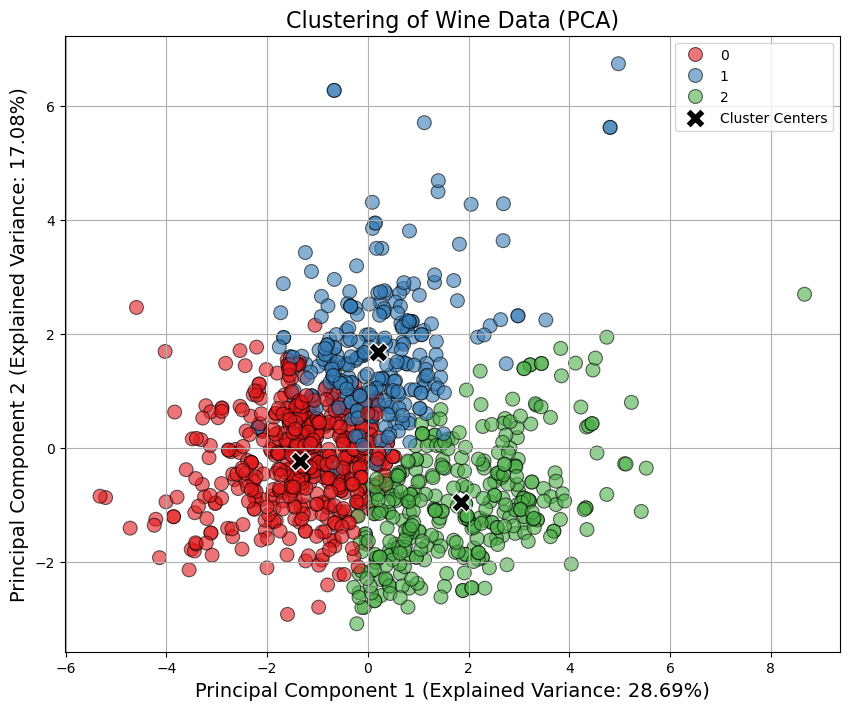


Cluster Centers (in original feature space):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.641983          0.417753    -0.739186       -0.251632  -0.199384   
1      -0.084731          0.085333     0.069697        0.358669  -0.001542   
2       1.027850         -0.692292     1.053600        0.098579   0.299987   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.217200             -0.351415 -0.461486  0.587540  -0.274487   
1             1.039629              1.301636  0.278482 -0.175907  -0.196907   
2            -0.481788             -0.484107  0.475325 -0.743876   0.564236   

    alcohol  
0  0.083240  
1 -0.533733  
2  0.289705  

Cluster Counts:
cluster
0    523
1    271
2    349
Name: count, dtype: int64

Cluster Centers (in PCA space):
        PC1       PC2
0 -1.344055 -0.233387
1  0.207745  1.680067
2  1.852843 -0.954833

Cluster Centers (in the original feature space):
   fixed acidity  v

In [6]:
# Prepare the features by removing the 'Id' column
X = df.drop(columns=['quality', 'Id'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the KMeans model with an optimized number of clusters (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to the original dataframe
df['cluster'] = kmeans.labels_

# Perform PCA to reduce the dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters using the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='Set1', s=100, alpha=0.6, edgecolor='black')
plt.title('Clustering of Wine Data (PCA)', fontsize=16)

# Rename the components based on their significance (e.g., "Principal Component 1" and "Principal Component 2")
plt.xlabel('Principal Component 1 (Explained Variance: {:.2f}%)'.format(pca.explained_variance_ratio_[0] * 100), fontsize=14)
plt.ylabel('Principal Component 2 (Explained Variance: {:.2f}%)'.format(pca.explained_variance_ratio_[1] * 100), fontsize=14)

plt.legend(title="Cluster", fontsize=12)
plt.grid(True)

# Mark the cluster centers on the plot
centers = pca.transform(kmeans.cluster_centers_)  # Project cluster centers into the PCA space
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200, label='Cluster Centers', edgecolor='white')
plt.legend()

# Show the plot
plt.show()

# Display the cluster centers (in the original feature space)
print("\nCluster Centers (in original feature space):")
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(cluster_centers_df)

# Table for Cluster Counts
cluster_counts = df['cluster'].value_counts().sort_index()
print("\nCluster Counts:")
print(cluster_counts)

# Table for Cluster Centers
print("\nCluster Centers (in PCA space):")
cluster_centers_pca_df = pd.DataFrame(centers, columns=['PC1', 'PC2'])
print(cluster_centers_pca_df)

# Display cluster centers in the original feature space
print("\nCluster Centers (in the original feature space):")
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(cluster_centers_df)

# Display the count of samples in each cluster
cluster_counts = df['cluster'].value_counts()
print("\nCluster Counts:")
print(cluster_counts)

# Calculate silhouette score for the clustering
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("\nSilhouette Score for the Clustering:", silhouette_avg)

# Group the data by cluster and show the summary statistics of each cluster
cluster_summary = df.groupby('cluster').mean()
print("\nSummary Statistics of Features by Cluster:")
print(cluster_summary)

# Profile each cluster in more detail
cluster_profile = df.groupby('cluster').agg(['mean', 'std', 'min', 'max'])
print("\nDetailed Cluster Profiles (Mean, Std, Min, Max):")
print(cluster_profile)

WCSS for Different Numbers of Clusters:
Clusters: 1, WCSS: 1354333.2611
Clusters: 2, WCSS: 507039.4063
Clusters: 3, WCSS: 288310.6906
Clusters: 4, WCSS: 208188.4551
Clusters: 5, WCSS: 167137.9808
Clusters: 6, WCSS: 122170.3087
Clusters: 7, WCSS: 102683.1247
Clusters: 8, WCSS: 89382.4470
Clusters: 9, WCSS: 78967.5640
Clusters: 10, WCSS: 69010.2549


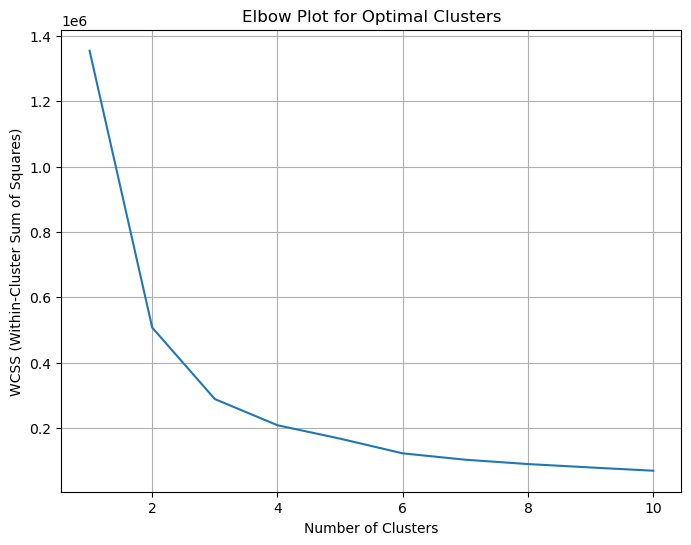

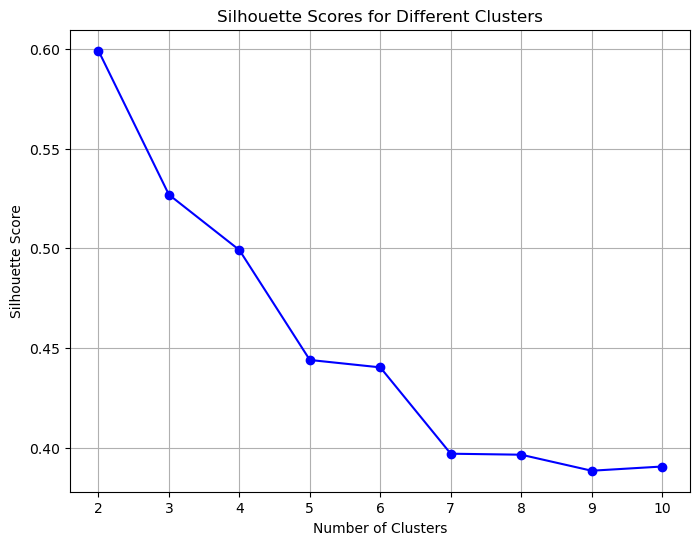

Silhouette Scores for Different Numbers of Clusters:
Clusters: 2, Silhouette Score: 0.5991
Clusters: 3, Silhouette Score: 0.5269
Clusters: 4, Silhouette Score: 0.4991
Clusters: 5, Silhouette Score: 0.4440
Clusters: 6, Silhouette Score: 0.4402
Clusters: 7, Silhouette Score: 0.3969
Clusters: 8, Silhouette Score: 0.3964
Clusters: 9, Silhouette Score: 0.3884
Clusters: 10, Silhouette Score: 0.3905


In [9]:
# Elbow Plot
wcss = []  # List to store the Within-Cluster Sum of Squares
for i in range(1, 11):  # Try clustering from 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Display the WCSS table
print("WCSS for Different Numbers of Clusters:")
for i in range(1, 11):
    print(f"Clusters: {i}, WCSS: {wcss[i-1]:.4f}")


plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Plot for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# Silhouette Plot
silhouette_scores = []  # List to store silhouette scores for different cluster counts
for i in range(2, 11):  # Start from 2 clusters as silhouette score needs at least 2 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='b')
plt.title('Silhouette Scores for Different Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Print the silhouette scores to find the best clustering number
print("Silhouette Scores for Different Numbers of Clusters:")
for i in range(2, 11):
    print(f"Clusters: {i}, Silhouette Score: {silhouette_scores[i-2]:.4f}")


Linear Regression Coefficients:
Coefficient: [0.18370584]
Intercept: 5.501302746218
Table of Actual vs Predicted Values:
      Cluster  Actual Quality  Predicted Quality
0           0               5           5.501303
1           1               5           5.685009
2           0               5           5.501303
3           2               6           5.868714
4           0               5           5.501303
...       ...             ...                ...
1138        0               6           5.501303
1139        0               6           5.501303
1140        0               5           5.501303
1141        0               6           5.501303
1142        0               5           5.501303

[1143 rows x 3 columns]


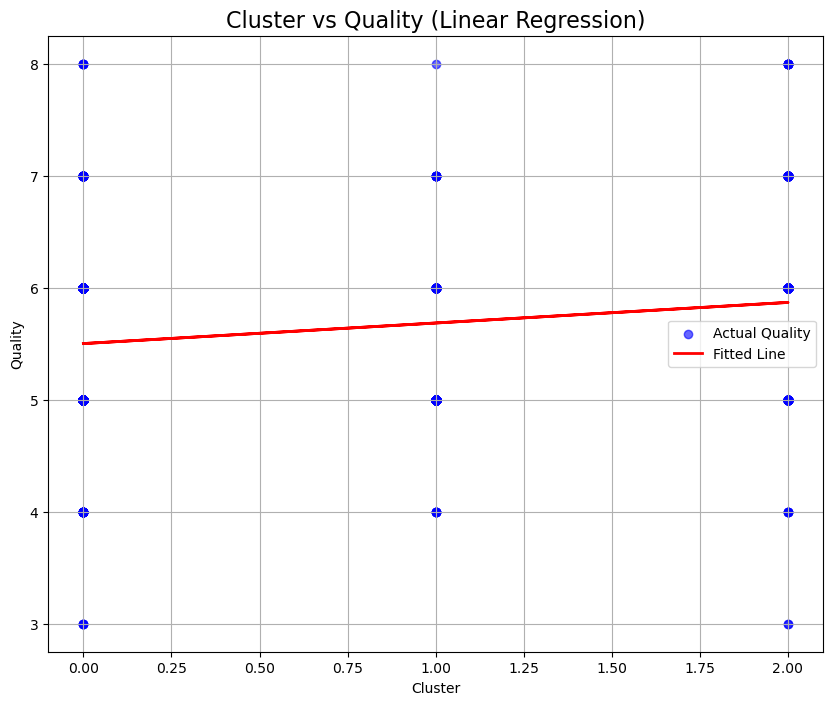


R-squared for the Linear Regression Model: 0.038478563224318196


In [11]:
# Prepare the data for regression
X_reg = df[['cluster']]  # Use the cluster label as a feature
y_reg = df['quality']   # Target variable (for simplicity, predicting 'quality')

# Fit a linear regression model
reg_model = LinearRegression()
reg_model.fit(X_reg, y_reg)

# Print the regression coefficients and intercept
print("\nLinear Regression Coefficients:")
print("Coefficient:", reg_model.coef_)
print("Intercept:", reg_model.intercept_)

# Make predictions using the model
y_pred = reg_model.predict(X_reg)

# Create a DataFrame for actual and predicted values
results_df = pd.DataFrame({
    'Cluster': df['cluster'],
    'Actual Quality': y_reg,
    'Predicted Quality': y_pred
})

# Display the table
print("Table of Actual vs Predicted Values:")
print(results_df)

# Plot the actual vs predicted values for the linear regression model
plt.figure(figsize=(10, 8))
plt.scatter(df['cluster'], y_reg, color='blue', label='Actual Quality', alpha=0.6)
plt.plot(df['cluster'], y_pred, color='red', label='Fitted Line', linewidth=2)
plt.title('Cluster vs Quality (Linear Regression)', fontsize=16)
plt.xlabel('Cluster')
plt.ylabel('Quality')
plt.legend()
plt.grid(True)
plt.show()

# Check the R-squared score for the fit
r_squared = reg_model.score(X_reg, y_reg)
print("\nR-squared for the Linear Regression Model:", r_squared)